<a href="https://colab.research.google.com/github/ashmit009/Computer-Vision/blob/main/cvlab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. a) Write a program to Access the Camera.
b) write a program for video writing

<IPython.core.display.Javascript object>

Saved to photo.jpg


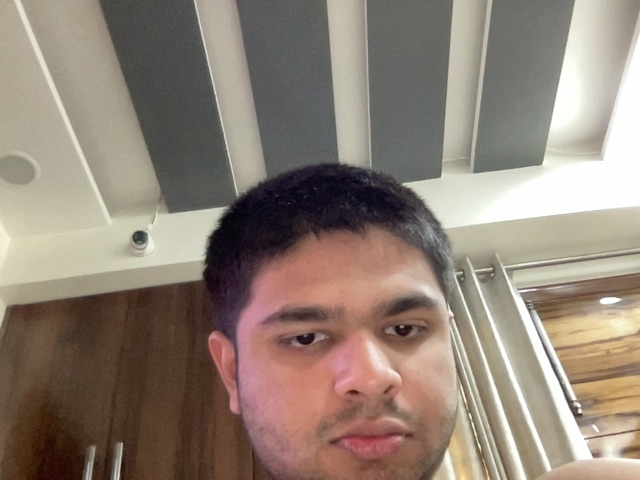

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = 'Capture';
    div.appendChild(capture);
    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    document.body.appendChild(div);
    div.appendChild(video);
    video.srcObject = stream;
    await video.play();
    // Resize the output to fit the video element.
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    // Wait for Capture to be clicked.
    await new Promise((resolve) => capture.onclick = resolve);
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))  # Printing the error message


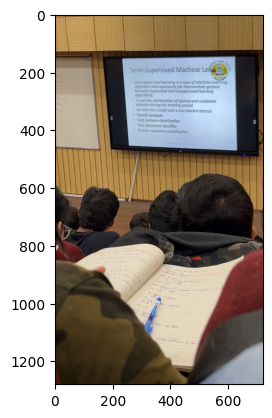

In [ ]:
########## Read a video
import cv2
source = '/content/recorded-3005894496655.mp4' # source = 0 for webcam
cap = cv2.VideoCapture(source)
if not cap.isOpened():
    print("Error opening video stream or file")
#Read and display one frame
ret, frame = cap.read()
import matplotlib.pyplot as plt
plt.imshow(frame[..., ::-1])

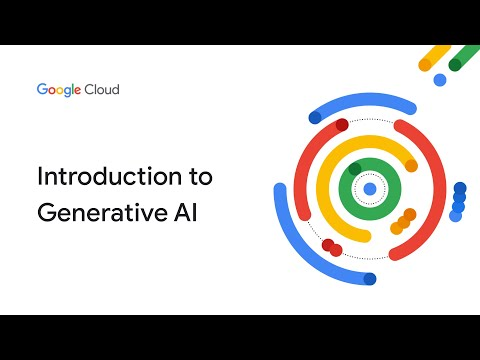

In [ ]:
from IPython.display import YouTubeVideo
video = YouTubeVideo("G2fqAlgmoPo", width=700, height=438)
display(video)

In [ ]:
import cv2
import sys

def access_camera(camera_source=0):
    source = cv2.VideoCapture(camera_source)
    win_name = 'Camera Preview'
    cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

    while cv2.waitKey(1) != 27: # Escape key
        has_frame, frame = source.read()
        if not has_frame:
            break
        cv2.imshow(win_name, frame)

    source.release()
    cv2.destroyAllWindows()

# Access camera
access_camera()

# Read a video file and display one frame
def read_video(video_source):
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    ret, frame = cap.read()
    if ret:
        cv2.imshow("Frame", frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Read a video
video_source = '/content/recorded-3005894496655.mp4'
read_video(video_source)

# Read the whole video
def play_video(video_source):
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    win_name = 'Video Preview'
    cv2.namedWindow(win_name, cv2.WINDOW_FULLSCREEN)

    while cv2.waitKey(1) != 27: # Escape key
        has_frame, frame = cap.read()
        if not has_frame:
            break
        cv2.imshow(win_name, frame)

    cap.release()
    cv2.destroyAllWindows()

# Play a video
play_video(video_source)

# Write Video using OpenCV
def write_video(video_source, output_file):
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out_mp4 = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

    while cv2.waitKey(1) != 27: # Escape key
        ret, frame = cap.read()
        if ret:
            out_mp4.write(frame)
        else:
            break

    cap.release()
    out_mp4.release()
    cv2.destroyAllWindows()

# Write a video
output_file = "new_vid.mp4"
write_video(video_source, output_file)
